In [1]:
from pyspark.sql import SparkSession

# Create a SparkSession that runs locally
spark = SparkSession.builder \
    .appName("Movies Recommender System") \
    .master("local[*]") \
    .getOrCreate()
sc = spark.sparkContext

# Read the movies.csv file from the local machine
movies = spark.read \
    .format('csv') \
    .option('header', 'true') \
    .load('movies.csv')

movies.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/12 02:32:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows



In [2]:
# Read the ratings.csv file from the local machine
ratings = spark.read\
  .format('csv')\
  .option('header', 'true')\
  .load('ratings.csv')
ratings.take(5)

[Row(userId='1', movieId='1', rating='4.0', timestamp='964982703'),
 Row(userId='1', movieId='3', rating='4.0', timestamp='964981247'),
 Row(userId='1', movieId='6', rating='4.0', timestamp='964982224'),
 Row(userId='1', movieId='47', rating='5.0', timestamp='964983815'),
 Row(userId='1', movieId='50', rating='5.0', timestamp='964982931')]

In [3]:
print(spark.version)

3.3.2


In [4]:
print(sc.defaultParallelism)

10


In [5]:
print(sc.getConf().toDebugString())

spark.app.id=local-1683883971710
spark.app.name=Movies Recommender System
spark.app.startTime=1683883971212
spark.app.submitTime=1683883971084
spark.driver.extraJavaOptions=-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED
spark.driver.host=10.0.0.30
spark.driver.port=62140
spark.executor.extraJavaOptions=-XX:+IgnoreUnreco

In [6]:
print('Number of partitions for the movies DataFrame: {}'.format(movies.rdd.getNumPartitions()))
print('Number of partitions for the ratings DataFrame: {}'.format(ratings.rdd.getNumPartitions()))

Number of partitions for the movies DataFrame: 1
Number of partitions for the ratings DataFrame: 1


In [7]:
repartitionedRatings = ratings.repartition(10)
print('Number of partitions for the ratings DataFrame: {}'.format(ratings.rdd.getNumPartitions()))
print('Number of partitions for the repartitionedRatings DataFrame: {}'.format(repartitionedRatings.rdd.getNumPartitions()))

Number of partitions for the ratings DataFrame: 1
Number of partitions for the repartitionedRatings DataFrame: 10


In [8]:
print('Number of ratings: {}'.format(repartitionedRatings.count()))

Number of ratings: 100836


In [9]:
repartitionedRatings.cache()

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

In [10]:
print('Number of ratings: {}'.format(repartitionedRatings.count()))

Number of ratings: 100836


In [11]:
movies.show(truncate=False)

+-------+-------------------------------------+-------------------------------------------+
|movieId|title                                |genres                                     |
+-------+-------------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)   |Comedy                                     |
|6      |Heat (1995)                          |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                       |Comedy|Romance                             |
|8      |Tom and Huck (1995)                  |Adventure|Children               

In [12]:
movies.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [13]:
# Read movies.csv file from a local path or URL
movies = spark.read \
    .csv('movies.csv', header=True, inferSchema=True) \
    .repartition(10) \
    .cache()

# Read ratings.csv file from a local path or URL
ratings = spark.read \
    .csv('ratings.csv', header=True, inferSchema=True) \
    .repartition(10) \
    .cache()

movies.show(5)
ratings.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
| 147196|    The Girls (1961)|      Comedy|Romance|
| 148172| The 5th Wave (2016)|Adventure|Sci-Fi|...|
|   6201|    Lady Jane (1986)|       Drama|Romance|
|   7380|Ella Enchanted (2...|Comedy|Fantasy|Ro...|
| 103609|    Class Act (1992)|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|    74|   1103|   5.0|1207499290|
|   288|    589|   4.0| 976139234|
|   217|   3197|   3.0| 956195257|
|   381|   2628|   3.5|1200824541|
|   219|   2301|   4.5|1195944618|
+------+-------+------+----------+
only showing top 5 rows



In [14]:
movies.printSchema()
ratings.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [15]:
ratings.describe().show()

+-------+------------------+----------------+------------------+--------------------+
|summary|            userId|         movieId|            rating|           timestamp|
+-------+------------------+----------------+------------------+--------------------+
|  count|            100836|          100836|            100836|              100836|
|   mean|326.12756356856676|19435.2957177992| 3.501556983616962|1.2059460873684695E9|
| stddev|182.61849146349988|35530.9871987002|1.0425292390606347| 2.162610359951315E8|
|    min|                 1|               1|               0.5|           828124615|
|    max|               610|          193609|               5.0|          1537799250|
+-------+------------------+----------------+------------------+--------------------+



In [16]:
print('Number of different users: {}'.format(ratings.select('userId').distinct().count()))
print('Number of different movies: {}'.format(ratings.select('movieId').distinct().count()))
print('Number of movies with at least one rating strictly higher than 4: {}'.format(ratings.filter('rating > 4').select('movieId').distinct().count()))

Number of different users: 610
Number of different movies: 9724
Number of movies with at least one rating strictly higher than 4: 4056


In [17]:
ratings.createOrReplaceTempView('ratings')
spark.sql('SELECT COUNT(DISTINCT(movieId)) AS nb FROM ratings WHERE rating > 4').show()

+----+
|  nb|
+----+
|4056|
+----+



In [18]:
ratings_file_path = 'ratings.csv'
# Read ratings.csv file directly using SQL syntax
sql = f'SELECT * FROM csv.`{ratings_file_path}`'
ratings_ = spark.sql(sql)

ratings_.show(5)

+------+-------+------+---------+
|   _c0|    _c1|   _c2|      _c3|
+------+-------+------+---------+
|userId|movieId|rating|timestamp|
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
+------+-------+------+---------+
only showing top 5 rows



In [19]:
import pandas as pd

ratings.toPandas().head()

,userId,movieId,rating,timestamp
0,74,1103,5.0,1207499290
1,288,589,4.0,976139234
2,217,3197,3.0,956195257
3,381,2628,3.5,1200824541
4,219,2301,4.5,1195944618


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


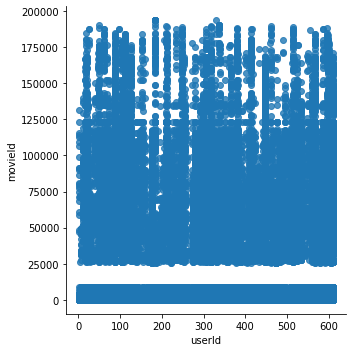

In [20]:
import seaborn as sns
%matplotlib inline

ratings_pd = ratings.toPandas()
sns.lmplot(x='userId', y='movieId', data=ratings_pd, fit_reg=False);

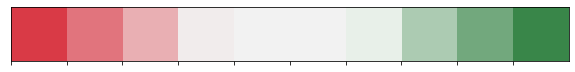

In [21]:
sns.palplot(sns.diverging_palette(10, 133, sep=80, n=10))

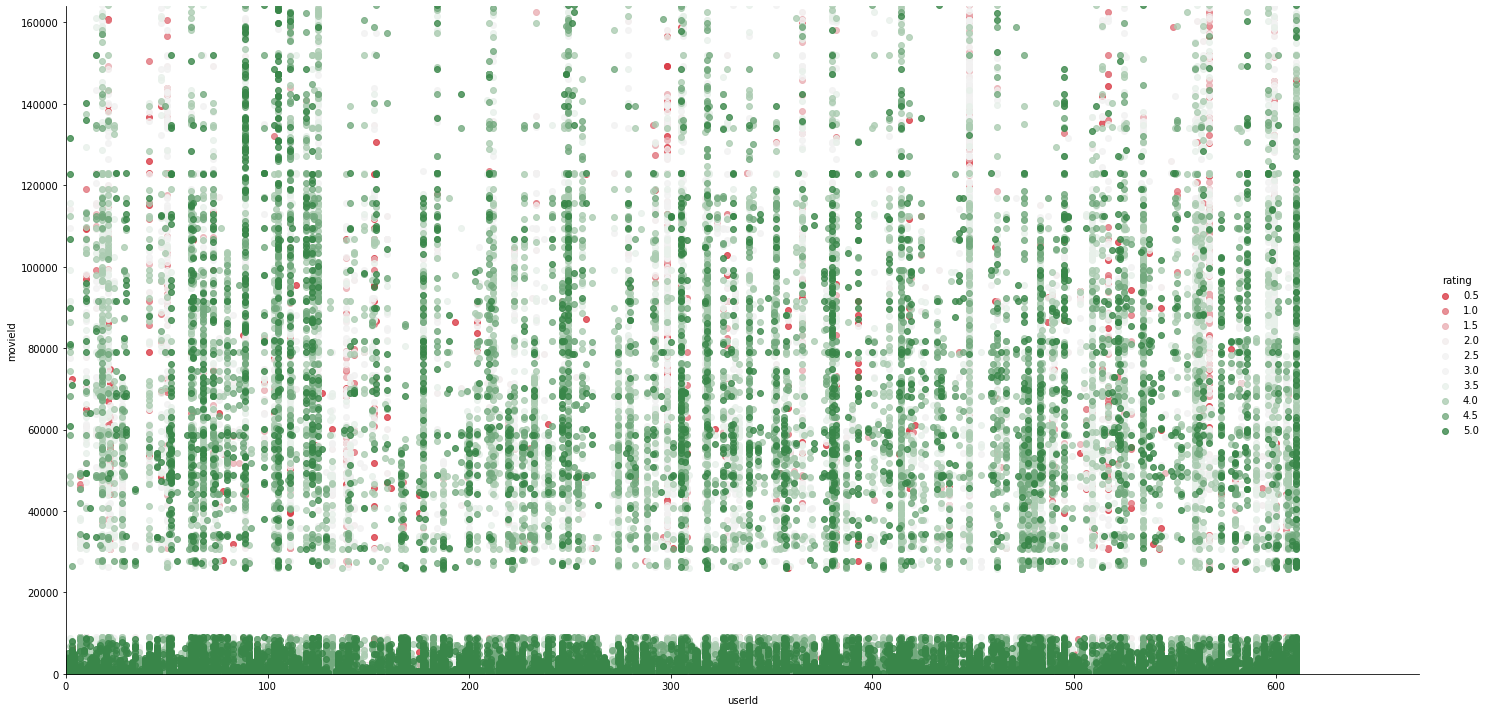

In [22]:
lm = sns.lmplot(x='userId', y='movieId', hue='rating', data=ratings_pd, fit_reg=False, height=10, aspect=2, palette=sns.diverging_palette(10, 133, sep=80, n=10))
axes = lm.axes
axes[0, 0].set_ylim(0, 163949) # max movieId is 163949
axes[0, 0].set_xlim(0, 671) # max userId is 671
lm;

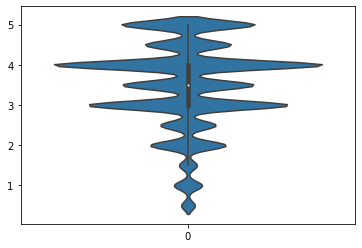

In [23]:
sns.violinplot([ratings_pd.rating]);

In [24]:
ratings_pd.groupby('movieId').count().sort_values(by='userId', ascending=False)

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
...,...,...,...
4093,1,1,1
4089,1,1,1
58351,1,1,1


In [25]:
movie_356 = ratings_pd[ratings_pd.movieId == 356]
movie_356.head()

,userId,movieId,rating,timestamp
86,113,356,4.0,980051894
318,321,356,5.0,843212439
551,233,356,5.0,1524781243
1146,533,356,5.0,1424753674
1204,367,356,5.0,997810956


<AxesSubplot:xlabel='rating', ylabel='userId'>

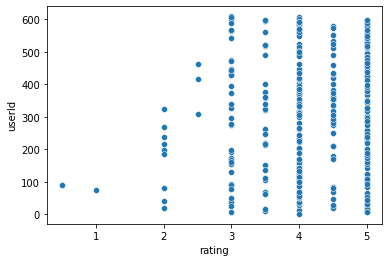

In [26]:
sns.scatterplot(x="rating", y = "userId", data = movie_356)

<AxesSubplot:xlabel='rating', ylabel='count'>

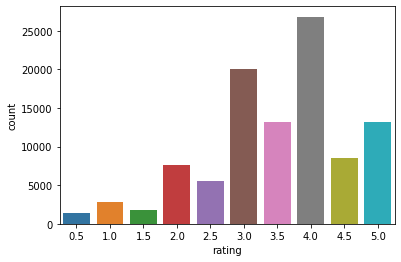

In [27]:
sns.countplot(x='rating', data=ratings_pd)

In [28]:
spark.sql('''
    SELECT *, 100 * nb_ratings/matrix_size AS percentage
    FROM (
        SELECT nb_users, nb_movies, nb_ratings, nb_users * nb_movies AS matrix_size
        FROM (
            SELECT COUNT(*) AS nb_ratings, COUNT(DISTINCT(movieId)) AS nb_movies, COUNT(DISTINCT(userId)) AS nb_users
            FROM ratings
        )
    )
''').toPandas().head()

,nb_users,nb_movies,nb_ratings,matrix_size,percentage
0,610,9724,100836,5931640,1.699968


In [29]:
(trainingRatings, testRatings) = ratings.randomSplit([80.0, 20.0])

In [30]:
from pyspark.ml.feature import CountVectorizer, Tokenizer, RegexTokenizer

def process_genres(movies_df):
    regexTokenizer = RegexTokenizer(inputCol="genres", outputCol="genres_tokens", pattern="\\|")
    movies_with_tokens = regexTokenizer.transform(movies_df)

    cv = CountVectorizer(inputCol="genres_tokens", outputCol="genres_vector")
    model = cv.fit(movies_with_tokens)
    movies_with_genres_vector = model.transform(movies_with_tokens)

    return movies_with_genres_vector

movies_with_genres = process_genres(movies)
movies_with_genres.show(truncate=False)


+-------+--------------------------------------------------------+-------------------------------------+-------------------------------------------+----------------------------------------+
|movieId|title                                                   |genres                               |genres_tokens                              |genres_vector                           |
+-------+--------------------------------------------------------+-------------------------------------+-------------------------------------------+----------------------------------------+
|147196 |The Girls (1961)                                        |Comedy|Romance                       |[comedy, romance]                          |(20,[1,4],[1.0,1.0])                    |
|148172 |The 5th Wave (2016)                                     |Adventure|Sci-Fi|Thriller            |[adventure, sci-fi, thriller]              |(20,[2,5,7],[1.0,1.0,1.0])              |
|6201   |Lady Jane (1986)                         

In [31]:
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

import numpy as np
from pyspark.sql.types import FloatType
def cosine_similarity(vec1, vec2):
    vec1, vec2 = np.array(vec1), np.array(vec2)
    return float(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))

cosine_similarity_udf = udf(cosine_similarity, FloatType())


In [32]:
from pyspark.sql.functions import desc, col

def content_based_recommendations(user_id, ratings_df, movies_with_genres_df, top_n=10):
    user_movies = ratings_df.filter(ratings_df.userId == user_id).select("movieId")
    user_movies = user_movies.join(movies_with_genres_df, on="movieId").alias("user_movies")
    
    movies_to_compare = movies_with_genres_df.select("movieId", "genres_vector").alias("movies_to_compare")

    cross_join = user_movies.crossJoin(movies_to_compare)
    cross_join = cross_join.withColumn("similarity", cosine_similarity_udf("user_movies.genres_vector", "movies_to_compare.genres_vector"))

    recommendations = cross_join.sort(desc("similarity")).select("movies_to_compare.movieId", "similarity").distinct().limit(top_n)
    recommendations = recommendations.alias("rec").join(movies.alias("mov"), col("rec.movieId") == col("mov.movieId")).select(col("rec.movieId"), col("mov.title"), col("mov.genres"), col("rec.similarity"))

    return recommendations


user_id = 133
print(f"Content-based recommendations for user {user_id}:")
content_based_recommendations(user_id, ratings, movies_with_genres).show(truncate=False)




Content-based recommendations for user 133:


+-------+--------------------------------+------------------------------------------------+----------+
|movieId|title                           |genres                                          |similarity|
+-------+--------------------------------+------------------------------------------------+----------+
|103609 |Class Act (1992)                |Comedy                                          |0.0       |
|196    |Species (1995)                  |Horror|Sci-Fi                                   |0.0       |
|52950  |Day Watch (Dnevnoy dozor) (2006)|Action|Fantasy|Horror|Thriller                  |0.0       |
|164179 |Arrival (2016)                  |Sci-Fi                                          |0.0       |
|4951   |Lord of the Flies (1990)        |Adventure|Drama|Thriller                        |0.6666667 |
|8363   |Soul Plane (2004)               |Comedy                                          |0.0       |
|2974   |Bats (1999)                     |Horror|Thriller                

In [33]:
user_id = 471
print(f"Content-based recommendations for user {user_id}:")
content_based_recommendations(user_id, ratings, movies_with_genres).show(truncate=False)

Content-based recommendations for user 471:


+-------+-----------------------------------------------+--------------------------------------+----------+
|movieId|title                                          |genres                                |similarity|
+-------+-----------------------------------------------+--------------------------------------+----------+
|103609 |Class Act (1992)                               |Comedy                                |0.0       |
|170399 |CHiPS (2017)                                   |Action|Comedy|Drama                   |0.6666667 |
|196    |Species (1995)                                 |Horror|Sci-Fi                         |0.0       |
|27311  |Batman Beyond: Return of the Joker (2000)      |Action|Animation|Crime|Sci-Fi|Thriller|0.2581989 |
|164179 |Arrival (2016)                                 |Sci-Fi                                |0.0       |
|170939 |Captain Underpants: The First Epic Movie (2017)|Action|Animation|Children|Comedy      |0.28867513|
|8363   |Soul Plane (2004)  

In [34]:
user_id = 496
print(f"Content-based recommendations for user {user_id}:")
content_based_recommendations(user_id, ratings, movies_with_genres).show(truncate=False)

Content-based recommendations for user 496:


+-------+--------------------------------+------------------------------+----------+
|movieId|title                           |genres                        |similarity|
+-------+--------------------------------+------------------------------+----------+
|103609 |Class Act (1992)                |Comedy                        |0.0       |
|196    |Species (1995)                  |Horror|Sci-Fi                 |0.0       |
|52950  |Day Watch (Dnevnoy dozor) (2006)|Action|Fantasy|Horror|Thriller|0.0       |
|4078   |Amazing Grace and Chuck (1987)  |Drama                         |0.70710677|
|89343  |Red State (2011)                |Action|Crime|Horror|Thriller  |0.35355338|
|164179 |Arrival (2016)                  |Sci-Fi                        |0.0       |
|8363   |Soul Plane (2004)               |Comedy                        |0.0       |
|6376   |Respiro (2002)                  |Comedy|Drama                  |0.5       |
|2974   |Bats (1999)                     |Horror|Thriller        

In [35]:
from pyspark.sql.functions import lit

def predict_ratings(user_id, movies_with_genres_df, test_movies):
    recommendations = content_based_recommendations(user_id, trainingRatings, movies_with_genres_df)
    recommendations = recommendations.withColumn("userId", lit(user_id))
    test_movie_ids = [row.movieId for row in test_movies.select("movieId").collect()]
    predicted_ratings = recommendations.filter(recommendations.movieId.isin(test_movie_ids))
    
    return predicted_ratings.select("userId", "movieId", "similarity")


In [36]:
from pyspark.sql.functions import sqrt, mean, abs
from pyspark.sql.types import IntegerType
import math

unique_user_ids = testRatings.select("userId").distinct().collect()
rmse_list = []
mae_list = []

for row in unique_user_ids:
    user_id = row.userId
    test_movies = testRatings.filter(testRatings.userId == user_id)
    predicted_ratings = predict_ratings(user_id, movies_with_genres, test_movies)
    
    actual_and_predicted = test_movies.alias("actual").join(predicted_ratings.alias("pred"), (col("actual.userId") == col("pred.userId")) & (col("actual.movieId") == col("pred.movieId"))).select(col("actual.rating"), col("pred.similarity"))
    
    if actual_and_predicted.count() > 0:  # Add this line
        error = actual_and_predicted.withColumn("error", col("rating") - col("similarity"))
        squared_error = error.withColumn("squared_error", col("error") ** 2)
        mean_squared_error = squared_error.agg(mean(col("squared_error"))).collect()[0][0]
        rmse = math.sqrt(mean_squared_error)
        absolute_error = error.withColumn("absolute_error", abs(col("error")))
        mean_absolute_error = absolute_error.agg(mean(col("absolute_error"))).collect()[0][0]
        
        rmse_list.append(rmse)
        mae_list.append(mean_absolute_error)


overall_rmse = np.mean(rmse_list)
overall_mae = np.mean(mae_list)

print("RMSE: {:.4f}".format(overall_rmse))
print("MAE: {:.4f}".format(overall_mae))


RMSE: 3.5698
MAE: 3.5670
